# Вводная часть

 Целью задачи было построить модель, предсказывающую пренадлежность к одоному из 16 классов. Качество решения будет оцениваться по метрике f1-score

# Анализ датасета + обработка

## Анализ картинок

Для создания модели нам предоставили 12367 изображений в разных разрешениях. Пропорции картинок тоже разные. Ниже превидена таблица с кол-вом картинок в соответствующем разрешении

| Разрешение | Количество изображений |
|------------|------------------------|
| (720, 1280, 3) | 5988 |
| (1080, 1920, 3) | 3238 |
| (480, 640, 3) | 1338 |
| (480, 720, 3) | 234 |
| (480, 712, 3) | 8 |
| (480, 654, 3) | 106 |
| (720, 1272, 3) | 51 |
| (480, 854, 3) | 594 |
| (470, 854, 3) | 72 |
| (480, 638, 3) | 19 |
| (720, 960, 3) | 139 |
| (1080, 1440, 3) | 140 |
| (480, 600, 3) | 67 |
| (468, 854, 3) | 8 |
| (640, 1280, 3) | 10 |
| (480, 360, 3) | 5 |
| (478, 854, 3) | 15 |
| (1080, 1916, 3) | 15 |
| (480, 848, 3) | 54 |
| (1080, 1906, 3) | 24 |
| (480, 800, 3) | 14 |
| (476, 854, 3) | 31 |
| (480, 646, 3) | 18 |
| (480, 624, 3) | 6 |
| (474, 854, 3) | 42 |
| (408, 720, 3) | 7 |
| (480, 656, 3) | 39 |
| (480, 648, 3) | 6 |
| (720, 900, 3) | 2 |
| (534, 1280, 3) | 13 |
| (720, 406, 3) | 5 |
| (720, 974, 3) | 2 |
| (720, 1278, 3) | 8 |
| (720, 1200, 3) | 3 |
| (480, 810, 3) | 4 |
| (720, 1266, 3) | 3 |
| (480, 632, 3) | 7 |
| (480, 852, 3) | 11 |
| (480, 786, 3) | 5 |
| (432, 768, 3) | 2 |
| (480, 840, 3) | 2 |
| (960, 1920, 3) | 1 |
| (716, 1280, 3) | 2 |
| (480, 806, 3) | 1 |
| (480, 272, 3) | 3 |
| (720, 1080, 3) | 4 |
| (1072, 1920, 3) | 1 |

Для построения модели необходимо превести все картинки к одинаковому разрешению. Мы пробовали разрешения 224х224 (в большинстве стандартных моделей) и 128х128

## Анализ таргета

В описании 20 исходных классов, но в данных их всего 16.

Мы заменили идентификаторы классов на последовательные числа от 0 до 15, где 0 это самый популярный класс, 15 самый редкий.

In [ ]:
target_feature_to_class_id = {
    0:0,
    3:1,
    9:2,
    5:3,
    6:4,
    16:5,
    4:6,
    8:7,
    2:8,
    11:9,
    12:10,
    13:11,
    18:12,
    10:13,
    14:14,
    1:15,
}

class_id_to_target_feature = {v:k for k,v in target_feature_to_class_id.items()}

print(f'target_feature -> class_id', target_feature_to_class_id)
print(f'class_id -> target_feature', class_id_to_target_feature)

После этого распределение классов стало как на картинке

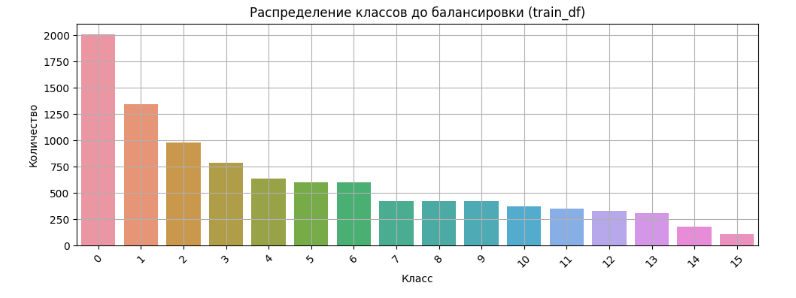

Доля разных классов:

| **Класс** | **Доля** |
|-------------|------------|
| 0           | 0.203121   |
| 1           | 0.135845   |
| 2           | 0.098892   |
| 3           | 0.079405   |
| 4           | 0.064688   |
| 5           | 0.060888   |
| 6           | 0.060807   |
| 7           | 0.043099   |
| 8           | 0.042856   |
| 9           | 0.042694   |
| 10          | 0.037924   |
| 11          | 0.035740   |
| 12          | 0.033153   |
| 13          | 0.031536   |
| 14          | 0.018436   |
| 15          | 0.010916   |


Качество модели оценивается по меетрике f1 macro, которая усреднением f1 разных классов. Получается, что ошибка в частых классах меньше влияет на метрику, чем ошибка в редких классах. Нам это надо учесть. Есть два подхода для решения этой проблемы:

1. Задать вес в loss функции обратнопропорционально частоте этого класса т.е. у редких классов вес будеет больше, у частых будет меньше. Таким способом пользовались при обучении ResNet модели

2. При обучении подавать данные в одинаковой пропорции, например с помощью WeightedRandomSampler. Возможная проблема от такого способа, что редкие классы модель может запомнить т.к. видит их много раз

# Лучшая модель + весь код

Лучшая модель дает результат 0.67602. Это смесь трех моделей (модель 6):


1. Сверточная сеть (модель 2 - 0.62863)
2. ResNet с меньшим числом регуляризаций (модель 3 - 0.62340)
3. ResNet с большим числом регуляризаций (модель 5 - 0.65676)


Все эксперименты выложены на google disk - https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi

# Эксперементы

# Модель 1 - основана на inception v3 (0.5689)

Идея(inception v3)

https://medium.com/swlh/understanding-inception-simplifying-the-network-architecture-54cd31d38949

Архитектура LeNet использовала свертки 5x5, AlexNet использовал свертки 3x3, 5x5, 11x11, а VGG использовала некоторую другую смесь сверток 3x3 и 5x5. Но вопросы, которые волновали ученых в области глубокого обучения, заключались в том, какую комбинацию сверток использовать в разных наборах данных, чтобы получить наилучшие результаты.

Например, если мы выберем свертки 5x5, то получим изрядное количество параметров, будет задействовано гораздо больше умножений, и им нужно много параметров, и они очень медленные, но, с другой стороны, это очень выразительно. Но если мы выберем свертки 1x1, это будет намного быстрее и не потребует много памяти, но, возможно, это будет работать не так хорошо. Имея эти вопросы в виду, в статье Google LeNet была предложена блестящая идея — почему бы просто не выбрать их все и не сложить в различные сверточные блоки.

https://kryptonite.ru/articles/googlenet-neiroslovar-vypusk-11/

Главным отличием архитектуры GoogLeNet от других свёрточных нейросетей (CNN) является использование дополнительного модуля начальной обработки данных — Inception. Он параллельно применяет свёртки с разными размерами ядра (1×1, 3×3, 5×5), а затем объединяет вектора признаков. Это позволяет эффективнее выделять локальные и глобальные признаки анализируемого изображения.

Внутри одного InceptionBlock, входной тензор идёт параллельно по четырём путям (или веткам) и потом соединяется в одно целое.

    def forward(self, x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1, b2, b3, b4], dim=1)


Благодаря этому мы объединяем признаки, выявленные на каждом пути вместе, и повышаем обощающую способность

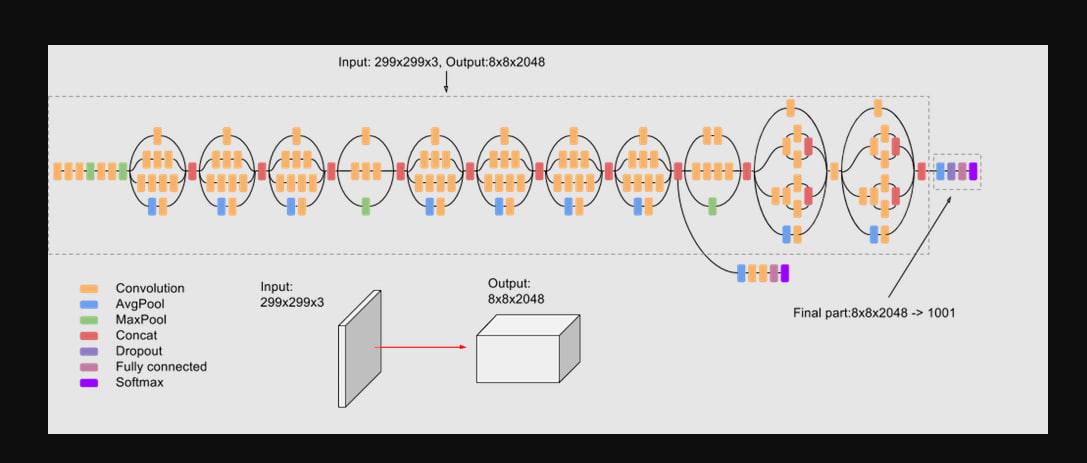

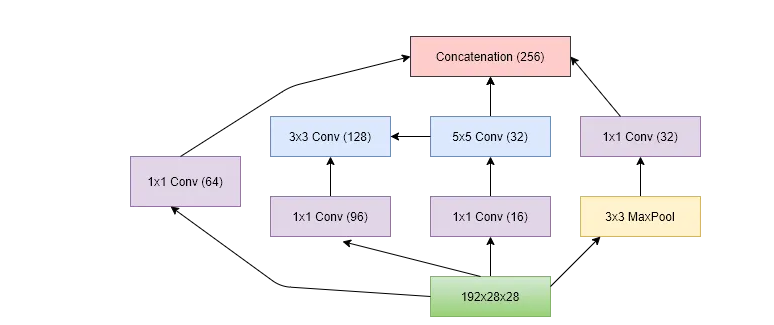

# 1 вариант

In [ ]:
transform_train = v2.Compose([
    v2.Resize(256),
    v2.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.75, 1.33)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(degrees=10),
    v2.RandomApply([v2.ColorJitter(0.1, 0.1, 0.1, 0.02)], p=0.8),
    v2.RandomPerspective(distortion_scale=0.2, p=0.3),
    v2.RandomErasing(p=0.3, scale=(0.02, 0.1), ratio=(0.3, 3.3)),
    v2.RandomApply([v2.GaussianBlur(kernel_size=3)], p=0.3),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_valid = v2.Compose([
    v2.Resize(224),
    v2.CenterCrop(224),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.001,
    weight_decay=1e-2
)

In [ ]:
# Inception блок
class InceptionBlock(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3_before, ch3x3, ch5x5_before, ch5x5, after_pool):
        super(InceptionBlock, self).__init__()
        self.branch1 = nn.Conv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3_before, kernel_size=1),
            #Если inplace=False (по умолчанию) — создаётся новый тензор с результатом.
            #Если inplace=True — результат записывается поверх входного тензора. Более оптимизировано
            nn.ReLU(inplace=True),
            nn.Conv2d(ch3x3_before, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5_before, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch5x5_before, ch5x5, kernel_size=5, padding=2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, after_pool, kernel_size=1)
        )

    def forward(self, x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1, b2, b3, b4], 1)

# Основная модель
class CustomInception(nn.Module):
    def __init__(self, num_classes=16):
        super(CustomInception, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception3a = InceptionBlock(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionBlock(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception4a = InceptionBlock(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionBlock(512, 160, 112, 224, 24, 64, 64)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        x = self.inception4b(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


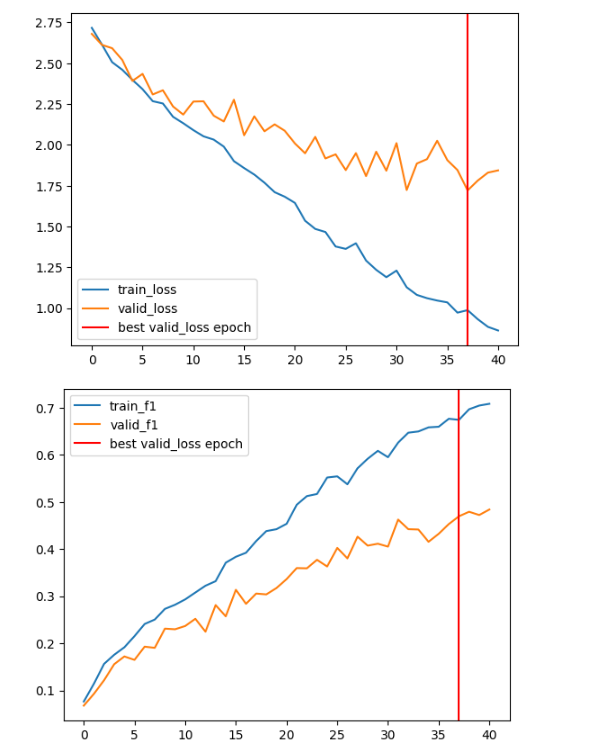

Видно сильное переобучение

# Выбор оптимизатора между adam и adamW

https://yassin01.medium.com/adam-vs-adamw-understanding-weight-decay-and-its-impact-on-model-performance-b7414f0af8a1



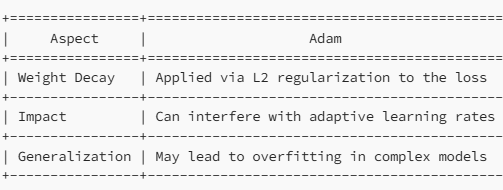
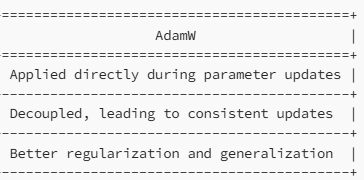

# 2 вариант + batchnorm

После добавления одинаковых пропорций классов и batchnorm(из-за сильно разных пропорций классов)

In [ ]:
from torch.utils.data import WeightedRandomSampler
train_df['target_count'] = train_df.groupby('target_feature')['target_feature'].transform('count')
sampler = WeightedRandomSampler(weights=1. / train_df['target_count'].values, num_samples=200 * batch_size, replacement=True)

In [ ]:
import torch.nn.functional as F

# Inception блок
class InceptionBlock(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3_before, ch3x3, ch5x5_before, ch5x5, after_pool):
        super(InceptionBlock, self).__init__()

        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, ch1x1, kernel_size=1),
            nn.BatchNorm2d(ch1x1),
            nn.ReLU(inplace=True)
        )

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3_before, kernel_size=1),
            nn.BatchNorm2d(ch3x3_before),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch3x3_before, ch3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(ch3x3),
            nn.ReLU(inplace=True)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5_before, kernel_size=1),
            nn.BatchNorm2d(ch5x5_before),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch5x5_before, ch5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(ch5x5),
            nn.ReLU(inplace=True)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, after_pool, kernel_size=1),
            nn.BatchNorm2d(after_pool),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        b1 = self.branch1(x)
        b2 = self.branch2(x)
        b3 = self.branch3(x)
        b4 = self.branch4(x)
        return torch.cat([b1, b2, b3, b4], dim=1)

# Основная модель
class CustomInception(nn.Module):
    def __init__(self, num_classes=16):
        super(CustomInception, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception3a = InceptionBlock(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = InceptionBlock(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, padding=1)

        self.inception4a = InceptionBlock(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = InceptionBlock(512, 160, 112, 224, 24, 64, 64)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        x = self.inception4b(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


model = CustomInception(num_classes=16)
model=model.to(device)

(теперь 200 итераций -> меньше эпох)

Ниже представлены показатели модели с оптимизатором adamW

In [ ]:
Эпоха: 1 train_loss: 2.1043 valid_loss: 2.1477 train_f1: 0.3075 valid_f1: 0.2901
Эпоха: 2 train_loss: 1.5792 valid_loss: 2.0026 train_f1: 0.4828 valid_f1: 0.3610
Эпоха: 3 train_loss: 1.1684 valid_loss: 2.1110 train_f1: 0.6182 valid_f1: 0.3763
Эпоха: 4 train_loss: 0.8807 valid_loss: 2.2612 train_f1: 0.7126 valid_f1: 0.4019

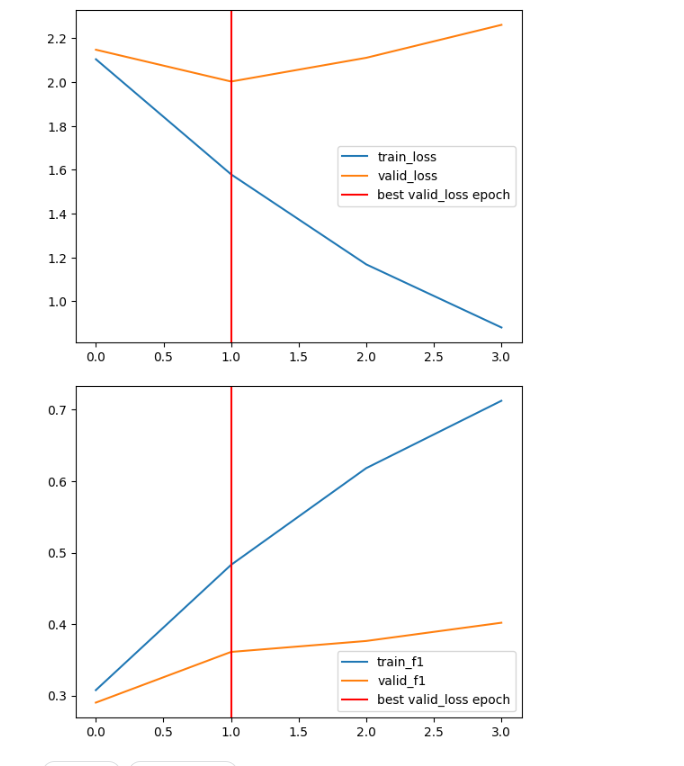

Ниже представлены показатели модели с оптимизатором adam

In [ ]:
Эпоха: 1 train_loss: 2.1299 valid_loss: 2.4462 train_f1: 0.3003 valid_f1: 0.2534
Эпоха: 2 train_loss: 1.5693 valid_loss: 2.3828 train_f1: 0.4882 valid_f1: 0.2821
Эпоха: 3 train_loss: 1.1561 valid_loss: 2.0970 train_f1: 0.6230 valid_f1: 0.3608
Эпоха: 4 train_loss: 0.8476 valid_loss: 2.1442 train_f1: 0.7244 valid_f1: 0.4436
Эпоха: 5 train_loss: 0.6488 valid_loss: 1.6540 train_f1: 0.7874 valid_f1: 0.5040

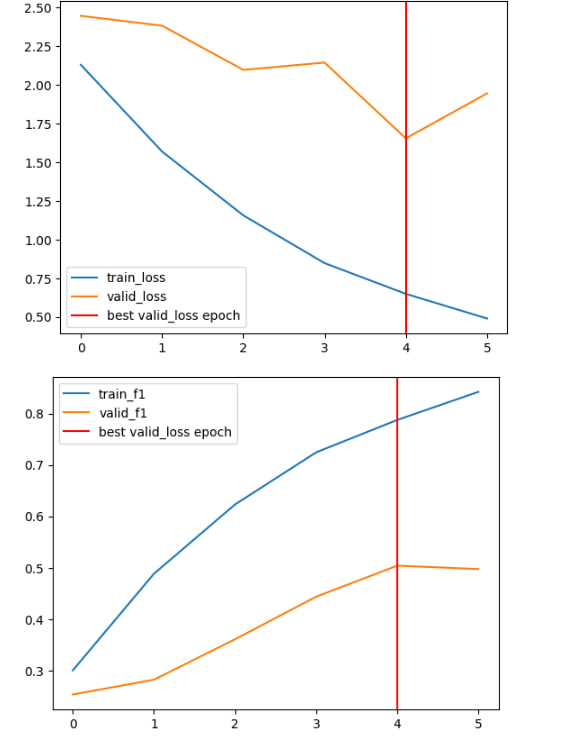

# 3 вариант + focal loss

https://medium.com/visionwizard/understanding-focal-loss-a-quick-read-b914422913e7

Focal Loss — это модификация стандартной функции потерь, которая снижает вес простых для классификации примеров и увеличивает вес сложных примеров. Это особенно полезно для работы с несбалансированными данными, где редкие классы могут быть сложными для распознавания.

Выведение математической формулы

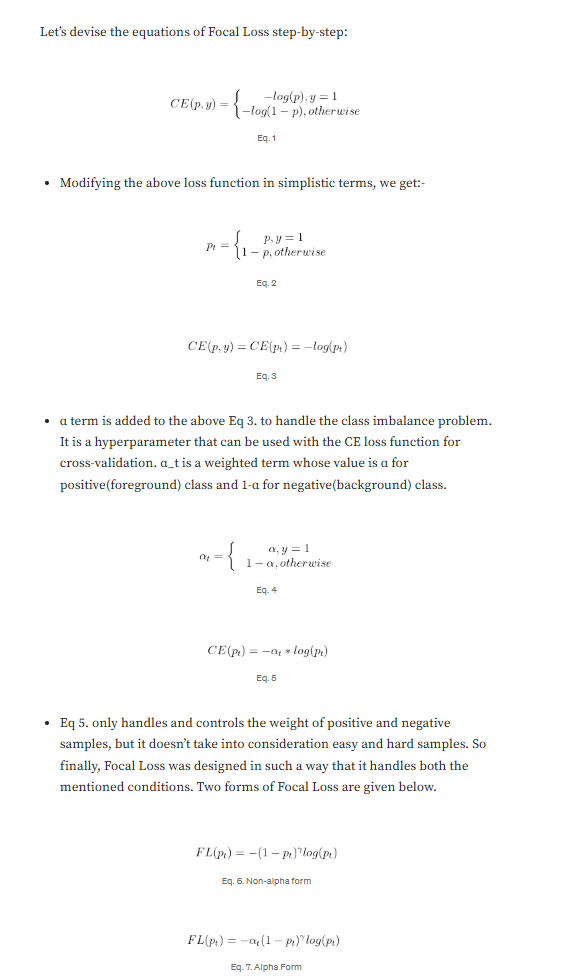

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        """
        :param alpha: Вес для корректировки дисбаланса классов.
        :param gamma: Степень фокусировки на сложных примерах.
        :param reduction: Способ объединения потерь ('mean', 'sum' или 'none').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        :param inputs: Логиты (не вероятности), выход модели.
        :param targets: Истинные метки классов.
        """
        # Вычисляем вероятности классов через softmax
        probas = F.softmax(inputs, dim=1)
        # Выбираем вероятность правильного класса для каждого примера
        probas = probas.gather(dim=1, index=targets.unsqueeze(1)).squeeze(1)

        # Вычисляем модифицированный логарифм вероятности
        focal_weight = self.alpha * (1 - probas) ** self.gamma
        loss = focal_weight * F.cross_entropy(inputs, targets, reduction='none')

        # Объединение потерь в зависимости от параметра reduction
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# Пример использования
focal_loss = FocalLoss(alpha=0.5, gamma=2.0)

In [ ]:
Эпоха: 1 train_loss: 1.0944 valid_loss: 1.0612 train_f1: 0.0308 valid_f1: 0.0211
Эпоха: 2 train_loss: 1.0212 valid_loss: 0.9932 train_f1: 0.0574 valid_f1: 0.0604
Эпоха: 3 train_loss: 0.9569 valid_loss: 0.9136 train_f1: 0.0933 valid_f1: 0.1051
Эпоха: 4 train_loss: 0.8990 valid_loss: 0.8623 train_f1: 0.1416 valid_f1: 0.1417
Эпоха: 5 train_loss: 0.8391 valid_loss: 0.7979 train_f1: 0.1855 valid_f1: 0.1931
Эпоха: 6 train_loss: 0.7960 valid_loss: 0.7653 train_f1: 0.2178 valid_f1: 0.2337
Эпоха: 7 train_loss: 0.7531 valid_loss: 0.7424 train_f1: 0.2448 valid_f1: 0.2346
Эпоха: 8 train_loss: 0.7157 valid_loss: 0.6963 train_f1: 0.2716 valid_f1: 0.2565
Эпоха: 9 train_loss: 0.6919 valid_loss: 0.7138 train_f1: 0.2915 valid_f1: 0.2584
Эпоха: 10 train_loss: 0.6565 valid_loss: 0.6855 train_f1: 0.3206 valid_f1: 0.2910
Эпоха: 11 train_loss: 0.6207 valid_loss: 0.6447 train_f1: 0.3507 valid_f1: 0.3292
Эпоха: 12 train_loss: 0.5829 valid_loss: 0.6196 train_f1: 0.3795 valid_f1: 0.3727
Эпоха: 13 train_loss: 0.5457 valid_loss: 0.6331 train_f1: 0.4115 valid_f1: 0.3525
Эпоха: 14 train_loss: 0.5110 valid_loss: 0.5964 train_f1: 0.4413 valid_f1: 0.4015
Эпоха: 15 train_loss: 0.4705 valid_loss: 0.6356 train_f1: 0.4710 valid_f1: 0.3818
Эпоха: 16 train_loss: 0.4333 valid_loss: 0.6067 train_f1: 0.5023 valid_f1: 0.4183
Эпоха: 17 train_loss: 0.4046 valid_loss: 0.5885 train_f1: 0.5316 valid_f1: 0.4216
Эпоха: 18 train_loss: 0.3687 valid_loss: 0.5751 train_f1: 0.5670 valid_f1: 0.4547
Эпоха: 19 train_loss: 0.3420 valid_loss: 0.5887 train_f1: 0.5889 valid_f1: 0.4742
Эпоха: 20 train_loss: 0.3140 valid_loss: 0.6178 train_f1: 0.6165 valid_f1: 0.4567
Эпоха: 21 train_loss: 0.2877 valid_loss: 0.5574 train_f1: 0.6390 valid_f1: 0.4989
Эпоха: 22 train_loss: 0.2663 valid_loss: 0.5846 train_f1: 0.6653 valid_f1: 0.5011
Эпоха: 23 train_loss: 0.2433 valid_loss: 0.5881 train_f1: 0.6891 valid_f1: 0.4986
Эпоха: 24 train_loss: 0.2187 valid_loss: 0.6284 train_f1: 0.7112 valid_f1: 0.5002
Эпоха: 25 train_loss: 0.1933 valid_loss: 0.6530 train_f1: 0.7432 valid_f1: 0.4918
Эпоха: 26 train_loss: 0.1839 valid_loss: 0.6601 train_f1: 0.7511 valid_f1: 0.5087
Эпоха: 27 train_loss: 0.1627 valid_loss: 0.6641 train_f1: 0.7734 valid_f1: 0.5259
Эпоха: 28 train_loss: 0.1510 valid_loss: 0.6730 train_f1: 0.7934 valid_f1: 0.4981
Эпоха: 29 train_loss: 0.1367 valid_loss: 0.6989 train_f1: 0.8059 valid_f1: 0.5181
Эпоха: 30 train_loss: 0.1223 valid_loss: 0.6978 train_f1: 0.8209 valid_f1: 0.5264
Эпоха: 31 train_loss: 0.1215 valid_loss: 0.7220 train_f1: 0.8232 valid_f1: 0.5238
Эпоха: 32 train_loss: 0.1076 valid_loss: 0.7285 train_f1: 0.8394 valid_f1: 0.5431
Эпоха: 33 train_loss: 0.1014 valid_loss: 0.6988 train_f1: 0.8514 valid_f1: 0.5324
Эпоха: 34 train_loss: 0.0979 valid_loss: 0.7407 train_f1: 0.8564 valid_f1: 0.5430
Эпоха: 35 train_loss: 0.0871 valid_loss: 0.7035 train_f1: 0.8705 valid_f1: 0.5571
Эпоха: 36 train_loss: 0.0836 valid_loss: 0.6985 train_f1: 0.8774 valid_f1: 0.5429
Эпоха: 37 train_loss: 0.0812 valid_loss: 0.7395 train_f1: 0.8770 valid_f1: 0.5266

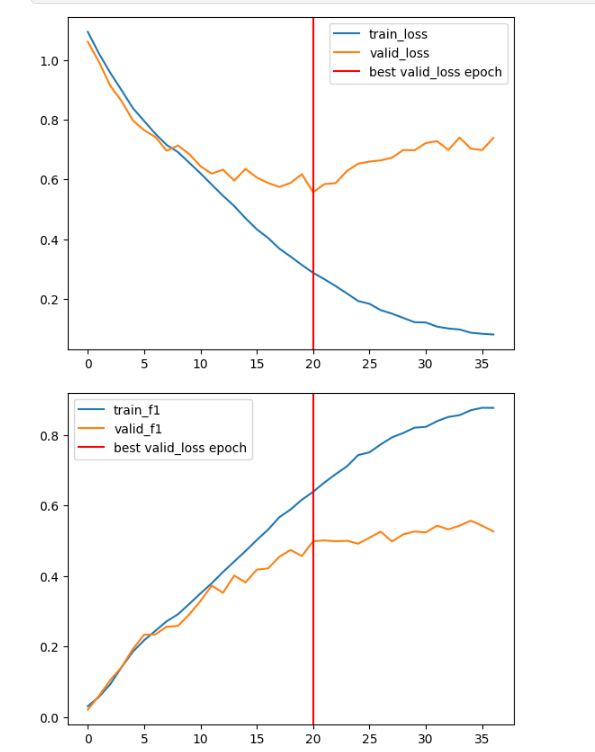

# Модель 2 - обычная conv модель (0.62863)

Простая сверточная модель в метрике соревнования принесла результат 0.62863.


Это простая модель из нескольких последовательных блоков, каждый из которых одинаковой структуры:

Conv2d -> BatchNorm2d -> ReLU -> MaxPool2d -> Dropout2d

На финальном этапе мы делаем усреднение, чтобы остались только каналы, с последующим Dropout и финальным линейным слоем

```
nn.AdaptiveAvgPool2d((1, 1)),
nn.Flatten(),
nn.Dropout(0.5),
nn.Linear(in_features=512, out_features=16),
```

Модель содержит 946,032 обучаемых параметра. Код для создания модели:

In [ ]:
def create_conv_model(dropout_conv = 0.1, dropout_linear = 0.3):
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(dropout_conv),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(dropout_conv),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(dropout_conv),

        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(dropout_conv),

        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(dropout_conv),

        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Dropout(0.5),
        nn.Linear(in_features=512, out_features=16),

    )
    print(summary(model, (32,3,224,224)))
    return model

Модель обучалась с оптимизитором Adam c lr=0.001, batch_size=256 и равномерными классами в обучающей выборке

In [ ]:
# Создаем loss функцию
loss_fn = nn.CrossEntropyLoss()

# Создаем оптимизатор, который будет обновлять веса модели с указаным lr
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Создаем даталоадеры с данными в батчах
batch_size = 256

# Создаем sampler, который для каждого элемента train учитывает долю таргета:
from torch.utils.data import WeightedRandomSampler
train_df['target_count'] = train_df.groupby('target_feature')['target_feature'].transform('count')
sampler = WeightedRandomSampler(weights=1. / train_df['target_count'].values, num_samples=200 * batch_size, replacement=True)

# num_workers=4, pin_memory=True - говрят должны в несколько потоков данные для gpu готовить
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, sampler=sampler, num_workers=4, pin_memory=True, prefetch_factor=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

Полный код модели, вывод notebook при обучениии и сохраненные файлы доступны в kaggle
https://www.kaggle.com/code/kirachistiakova/baseline?scriptVersionId=233714776

Так же все выложено в папку conv_net_model в google disk https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi

# Модель 3 - ResNet (0.62340)

Чтобы усложнить обычную сверточную сеть было решено попробовать добавить Skip Connection. В сетях со skip connection классической является ResNet

https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf


ResNet состоит из однотипных блоков, каждый из которых содержит два nn.Conv2d блока и активации ReLU между ними. Существует две реализаци где распологается BatchNorm - после nn.Conv2d (исходная реализация) или перед (обновленный вариант). Важной особенностью ResNet является skip connection, который добавляет к результату блока исходные данные (если размерность променялась, то пропускает это через nn.Conv2d для исправления размерности)


Классические ResNet блок выглядит так:

1. Если размерность входа и выхода совпадают
2. Если размерность входа и выхода не совпадают

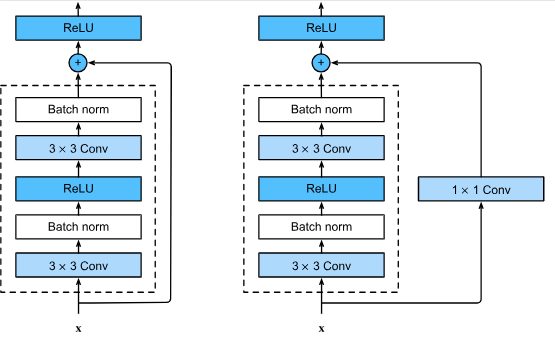

ResNet иcходно обучалась на больше чем 1М картинок, а у нас их только 12 тысяч, так что выбрали самую маленькую реализацию ResNet18 (18 слоев).

Первая версия очень быстро переобучалась (на train f1 0.99) за несколько эпох, так что было принято решение добавить регуляризации:
1. Dropout в каждый блок (в оригинале авторы не использовали)
2. DropPath - блок, который с определенной частотой блокирует все прохождение через себя (данные проходят только через skip connection)



Код DropPath - с указанной частотой блокирует передачу данных

```
    class DropPath(nn.Module):
        def __init__(self, drop_prob=0.0):
            super().__init__()
            self.drop_prob = drop_prob

        def forward(self, x):
            if self.drop_prob == 0. or not self.training:
                return x
            keep_prob = 1 - self.drop_prob
            shape = (x.shape[0],) + (1,) * (x.ndim - 1)
            random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
            random_tensor.floor_()
            return x.div(keep_prob) * random_tensor

```

Код нашего ResidualBlock
1. Основа современная версия классического ResidualBlock с BatchNorm2d перед Conv2d
2. LeakyReLU
3. Dropout
4. DropPath

```
    class ResidualBlock(nn.Module):
        def __init__(self, in_channels, out_channels, stride, drop_path_prob=0.1):
            super().__init__()

            self.main = nn.Sequential(
                nn.BatchNorm2d(in_channels),
                nn.LeakyReLU(0.1),
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.Dropout2d(dropout_conv),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
                nn.Dropout2d(dropout_conv),
            )

            self.skip = nn.Identity() if in_channels == out_channels and stride == 1 else nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels),
            )

            self.drop_path = DropPath(drop_prob=drop_path_prob)
            self.final_relu = nn.LeakyReLU(0.1)

        def forward(self, x):
            return self.final_relu(self.drop_path(self.main(x)) + self.skip(x))


```

 Итоговый код всей модели


 ```
 def create_resnet18_model(dropout_conv = 0.1, dropout_linear = 0.5, max_drop_path_rate=0.2):

    class DropPath(nn.Module):
        def __init__(self, drop_prob=0.0):
            super().__init__()
            self.drop_prob = drop_prob

        def forward(self, x):
            if self.drop_prob == 0. or not self.training:
                return x
            keep_prob = 1 - self.drop_prob
            shape = (x.shape[0],) + (1,) * (x.ndim - 1)
            random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
            random_tensor.floor_()
            return x.div(keep_prob) * random_tensor

    class ResidualBlock(nn.Module):
        def __init__(self, in_channels, out_channels, stride, drop_path_prob=0.1):
            super().__init__()

            self.main = nn.Sequential(
                nn.BatchNorm2d(in_channels),
                nn.LeakyReLU(0.1),
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.Dropout2d(dropout_conv),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
                nn.Dropout2d(dropout_conv),
            )

            self.skip = nn.Identity() if in_channels == out_channels and stride == 1 else nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels),
            )

            self.drop_path = DropPath(drop_prob=drop_path_prob)
            self.final_relu = nn.LeakyReLU(0.1)

        def forward(self, x):
            return self.final_relu(self.drop_path(self.main(x)) + self.skip(x))


    drop_path_rate = [x.item() for x in torch.linspace(0, max_drop_path_rate, 8)]  # 8 blocks total
    channels = 64

    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=channels, kernel_size=7, stride=2, padding=3, bias=False),
        nn.BatchNorm2d(channels),
        nn.LeakyReLU(0.1),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

        ResidualBlock(in_channels=channels, out_channels=channels, stride=1, drop_path_prob=drop_path_rate[0]),
        ResidualBlock(in_channels=channels, out_channels=channels, stride=1, drop_path_prob=drop_path_rate[1]),

        ResidualBlock(in_channels=channels, out_channels=channels*2, stride=2, drop_path_prob=drop_path_rate[2]),
        ResidualBlock(in_channels=channels*2, out_channels=channels*2, stride=1, drop_path_prob=drop_path_rate[3]),

        ResidualBlock(in_channels=channels*2, out_channels=channels*4, stride=2, drop_path_prob=drop_path_rate[4]),
        ResidualBlock(in_channels=channels*4, out_channels=channels*4, stride=1, drop_path_prob=drop_path_rate[5]),

        ResidualBlock(in_channels=channels*4, out_channels=channels*8, stride=2, drop_path_prob=drop_path_rate[6]),
        ResidualBlock(in_channels=channels*8, out_channels=channels*8, stride=1, drop_path_prob=drop_path_rate[7]),

        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Dropout(dropout_linear),
        nn.Linear(in_features=channels*8, out_features=16),
    )

    print(summary(model, input_size=(256, 3, 224, 224), col_names=["input_size", "output_size", "num_params"], depth=3))
    return model

```

Добавление Dropout + DropPath позволили дольше train и valid f1 оставаться в одном диапазоне. Без них они расходились практически сразу

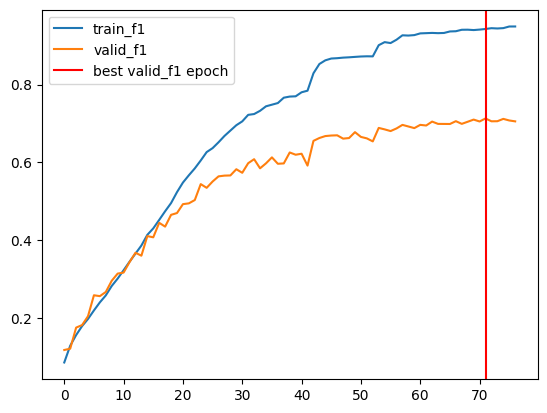

На loss тоже видно момент когда train loss резко уменьшается в середине обучения, но на валидации измненение плавное

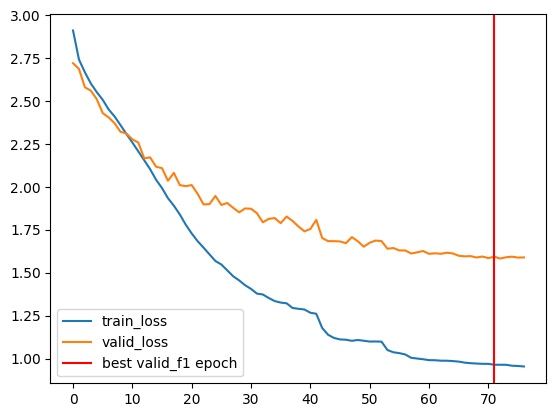

Итоговое качество этой модели: **0.62340**

Полный код модели, вывод notebook при обучениии и сохраненные файлы доступны в kaggle https://www.kaggle.com/code/kirachistiakova/baseline?scriptVersionId=234130421

Так же все выложено в папку resnet18 в google disk https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi

# Модель 4 - Микс сверточной (модель 2) и ResNet (модель 3) (0.65646)

У нас есть две модели с примерно одинаковым чаством (0.62863 и 0.62340), но одна модель обучалась на данных, где каждый класс был в одинаковом количествее, а другая с весами в loss функции. Попробуем смешать результаты

Результат это среднее из предсказаний модели convnet_model_0.6471.pt и модели resnet18_model_0.7129.pt

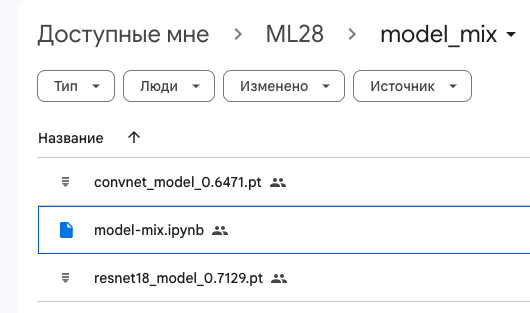

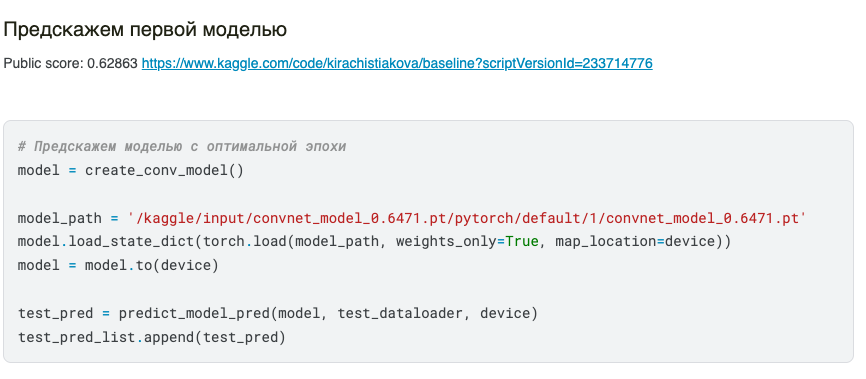

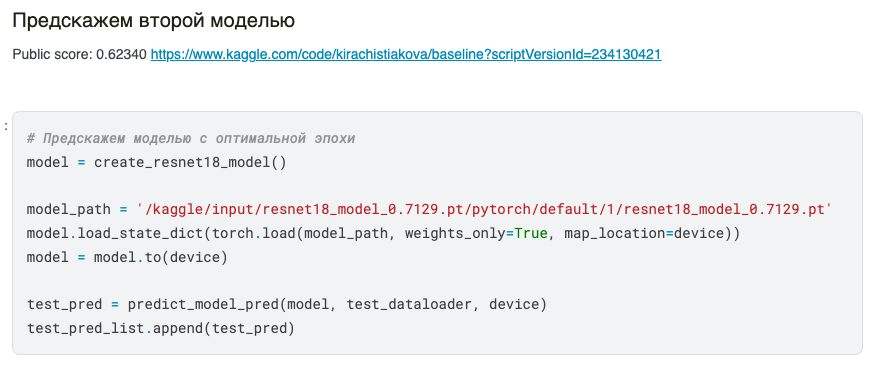

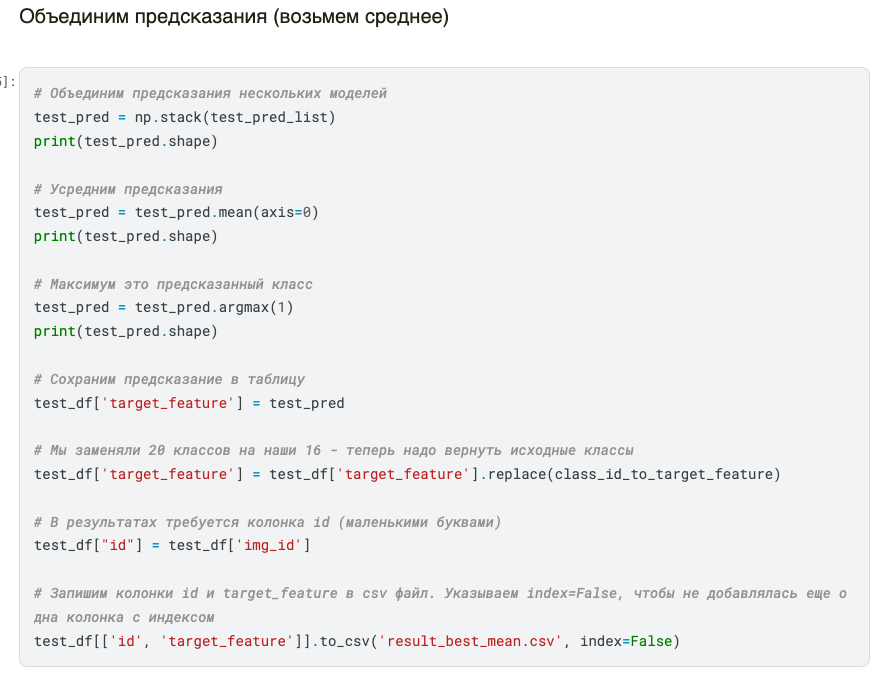

Полный код модели, вывод notebook при обучениии и сохраненные файлы доступны в kaggle
https://www.kaggle.com/code/kirachistiakova/model-mix?scriptVersionId=234639931

Так же все выложено в папку  model_mix в google disk https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi




# Модель 5 - ResNet - больше аугментации + дообучение на valid (0.65676)

По сравнению с моделью 3 мы взялии исходный блок ResNet (BatchNorm после Conv)

```
 class ResidualBlock(nn.Module):
        def __init__(self, in_channels, out_channels, stride, drop_path_prob=0.1):
            super().__init__()

            self.main = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                # nn.Dropout2d(dropout_conv),

                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                nn.Dropout2d(dropout_conv),
            )

            self.skip = nn.Identity() if in_channels == out_channels and stride == 1 else nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels),
            )

            self.drop_path = DropPath(drop_prob=drop_path_prob)
            self.final_relu = nn.LeakyReLU(0.1)

        def forward(self, x):
            x = self.drop_path(self.main(x)) + self.skip(x)
            x = self.final_relu(x)
            return x

```

Так же была существенно усилена аугментация
```
[
    # 1) Случайная обрезка + масштабирование
    v2.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.75, 1.33)),

    # 2) Флип и поворот
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(degrees=10),

    # 3) Цветовые аугментации
    v2.RandomApply([v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05)], p=0.8),
    v2.RandomGrayscale(p=0.1),


    # 4) Случайная перспектива и размытие
    v2.RandomPerspective(distortion_scale=0.2, p=0.3),
    v2.RandomApply([v2.GaussianBlur(kernel_size=3)], p=0.3),

    # 5) Случайное стирание блоков
    v2.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3)),

    # 6) Преобразование типа к float32
    v2.ToDtype(torch.float32, scale=True),

    # 6) Нормализация
    v2.Normalize(mean=[0.485, 0.456, 0.406],
                 std =[0.229, 0.224, 0.225]),
]
```

Полный код модели получился следующий:
```
# Сделаем модель с skip-conection
def create_resnet18_model(dropout_conv = 0.1, dropout_linear = 0.5, max_drop_path_rate=0.2):

    class DropPath(nn.Module):
        def __init__(self, drop_prob=0.0):
            super().__init__()
            self.drop_prob = drop_prob

        def forward(self, x):
            if self.drop_prob == 0. or not self.training:
                return x
            keep_prob = 1 - self.drop_prob
            shape = (x.shape[0],) + (1,) * (x.ndim - 1)
            random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
            random_tensor.floor_()
            return x.div(keep_prob) * random_tensor

    class ResidualBlock(nn.Module):
        def __init__(self, in_channels, out_channels, stride, drop_path_prob=0.1):
            super().__init__()

            self.main = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                # nn.Dropout2d(dropout_conv),

                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
                nn.BatchNorm2d(out_channels),
                nn.LeakyReLU(0.1),
                nn.Dropout2d(dropout_conv),
            )

            self.skip = nn.Identity() if in_channels == out_channels and stride == 1 else nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels),
            )

            self.drop_path = DropPath(drop_prob=drop_path_prob)
            self.final_relu = nn.LeakyReLU(0.1)

        def forward(self, x):
            x = self.drop_path(self.main(x)) + self.skip(x)
            x = self.final_relu(x)
            return x


    drop_path_rate = [x.item() for x in torch.linspace(0, max_drop_path_rate, 8)]  # 8 blocks total
    channels = 64

    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=channels, kernel_size=7, stride=2, padding=3, bias=False),
        nn.BatchNorm2d(channels),
        nn.LeakyReLU(0.1),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

        ResidualBlock(in_channels=channels, out_channels=channels, stride=1, drop_path_prob=drop_path_rate[0]),
        ResidualBlock(in_channels=channels, out_channels=channels, stride=1, drop_path_prob=drop_path_rate[1]),

        ResidualBlock(in_channels=channels, out_channels=channels*2, stride=2, drop_path_prob=drop_path_rate[2]),
        ResidualBlock(in_channels=channels*2, out_channels=channels*2, stride=1, drop_path_prob=drop_path_rate[3]),

        ResidualBlock(in_channels=channels*2, out_channels=channels*4, stride=2, drop_path_prob=drop_path_rate[4]),
        ResidualBlock(in_channels=channels*4, out_channels=channels*4, stride=1, drop_path_prob=drop_path_rate[5]),

        ResidualBlock(in_channels=channels*4, out_channels=channels*8, stride=2, drop_path_prob=drop_path_rate[6]),
        ResidualBlock(in_channels=channels*8, out_channels=channels*8, stride=1, drop_path_prob=drop_path_rate[7]),

        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(),
        nn.Dropout(dropout_linear),
        nn.Linear(in_features=channels*8, out_features=16),
    )

    print(summary(model, input_size=(128, 3, 224, 224), col_names=["input_size", "output_size", "num_params"], depth=3))
    return model

create_resnet18_model()
```

Эти изменения позоволи немного уменьшить переобучение. Видно, что в районе 0.5 f1 на train и valid начинает немного расходиться, но модель хорошо обучается до 0.6. Предыдущая версия ResNet начинала расходиться уже от 0.4

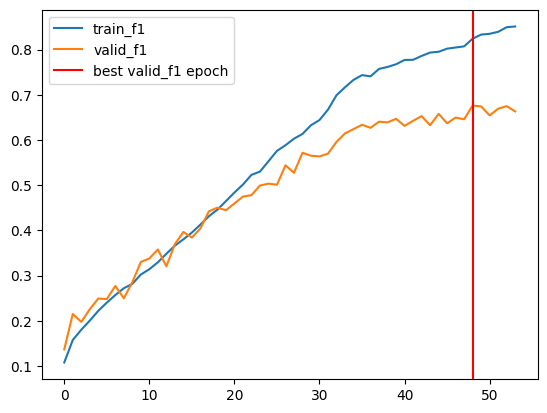

Поведение loss на train и valid при обучении ResNet подобной модели

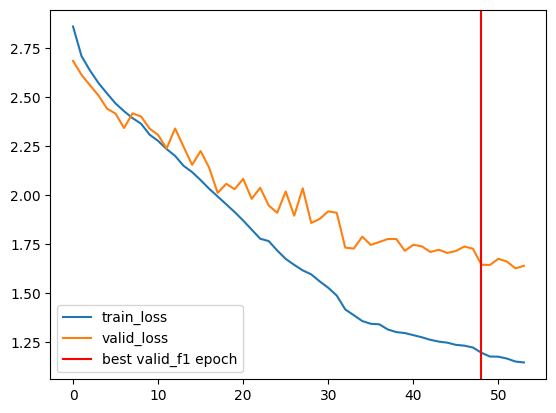

Анализ того как формируется итоговый F1 скор. Видно, что метрика в само редком классе самая маленькая (0.209) и она сильно влияет на наш итоговый скор (0.663)

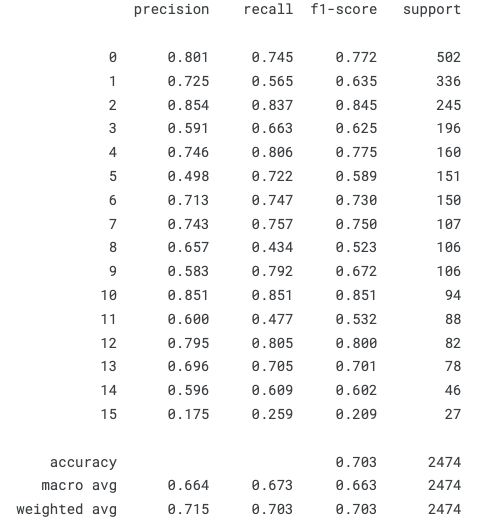

Так же построили confusion matrix, чтобы оценить какие ошибки модель совершает. Видно, что 15 класс ошибочно попадает в половину других классов.


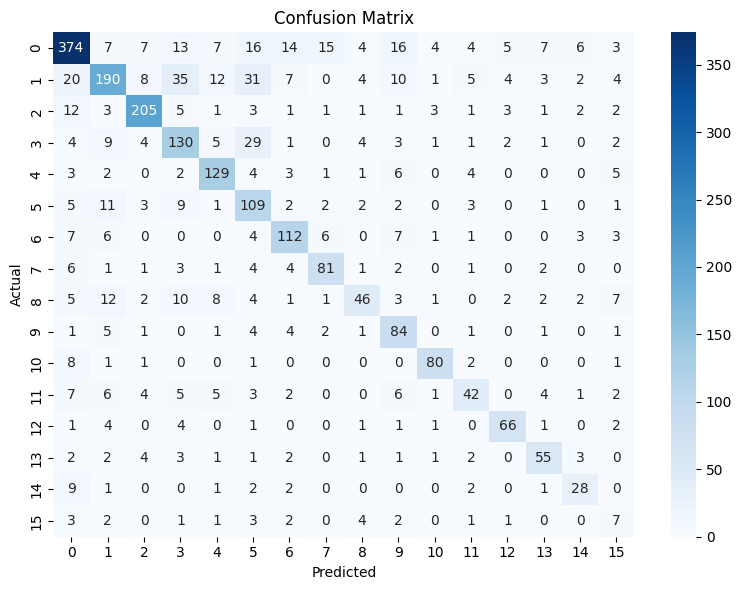

Модель дала результат на соревновании **0.62972**

Дальше мы решили дообучить на полных данных train + valid еще 2 эпохи

```
from torch.utils.data import ConcatDataset
train_dataset_long = ConcatDataset([train_dataset, valid_dataset])
train_dataloader = DataLoader(train_dataset_long, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

```

Это увеличило итоговый результат до **0.65676**

Полный код модели, вывод notebook при обучениии и сохраненные файлы доступны в kaggle  https://www.kaggle.com/code/kirachistiakova/resnet18?scriptVersionId=234774589

Так же все выложено в папку resnet18_full в google disk https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi

# Модель 6 - микс смешанной модели 4 и ResNet (модель 5) - 0.67602

Модель 4 (микс) дает 0.65646 и модель 5 (ResNet full) дает примерно столько же 0.65676. Попробуем их смешать. Финальный результат - **0.67602**

Получается что финальный результат это смесь трех моделей:

1. Сначала смешиваются convnet_model_0.6471.pt и resnet18_model_0.7129.pt (аналогично Модель 4)
2. Потом результат смешивается с предсказанием модели convnet_model_0.6471.pt и модели resnet18_model_0.7129.pt

Полный код модели, вывод notebook при обучениии и сохраненные файлы доступны в kaggle https://www.kaggle.com/code/kirachistiakova/model-mix?scriptVersionId=234919853

Так же все выложено в папку model_mix_final в google disk https://drive.google.com/drive/folders/1IYnwV9yyv1aSlVlwJ4XzsnYhNIsa7azi